In [3]:

# basic packages
import pandas as pd
import numpy as np
import datetime as dt
from pytz import timezone
import urllib
import os
import math
from scipy import stats
from scipy.signal import find_peaks, spectrogram

# packages for visualizations
import matplotlib.dates as mdates

from matplotlib import pyplot as plt


In [4]:
ev_load = './smartMeter/1minute_data_austin.csv'

df=pd.read_csv(ev_load )



In [5]:
# Filter out rows where 'car1' column is not NaN
filtered_df = df[df['car1'].notna()]

# Get the list of unique dataid values from the filtered DataFrame
unique_dataids_with_car1_values = filtered_df['dataid'].unique()

# Print the list of unique dataid values with non-NaN car1 values
print(unique_dataids_with_car1_values)

# [ 661 1642 2335 4373 6139 7719 9278 8156 4767]

[ 661 1642 2335 4373 6139 7719 9278 8156 4767]


In [6]:
# Filter the DataFrame to include only dataid 7982
filtered_df = df.loc[df['dataid'] == 661]

# Display the filtered DataFrame
filtered_df

,dataid,localminute,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,sprinkler1,sumppump1,utilityroom1,venthood1,waterheater1,waterheater2,wellpump1,winecooler1,leg1v,leg2v
0,661,2018-01-01 01:21:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,661,2018-01-01 01:00:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,661,2018-01-01 01:01:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,661,2018-01-01 01:02:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,661,2018-01-01 01:03:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12411596,661,2018-02-01 10:52:00-06,0.0,NaN,NaN,NaN,NaN,0.004,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.775,123.431
12411597,661,2018-02-01 10:53:00-06,0.0,NaN,NaN,NaN,NaN,0.004,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.776,123.432
12411598,661,2018-02-01 10:54:00-06,0.0,NaN,NaN,NaN,NaN,0.004,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.798,123.439
12411599,661,2018-02-01 10:55:00-06,0.0,NaN,NaN,NaN,NaN,0.004,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.945,123.319


In [7]:

# Assuming your DataFrame is called df
filtered_df.fillna(0, inplace=True)

/var/folders/s4/22x3mwpj4bldz0pl87jpf5th0000gn/T/ipykernel_59062/3518980308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.fillna(0, inplace=True)


In [8]:
# Drop columns with all NaN values
filtered_df = filtered_df.dropna(axis=1, how='all')

# Display the filtered DataFrame
filtered_df

,dataid,localminute,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,sprinkler1,sumppump1,utilityroom1,venthood1,waterheater1,waterheater2,wellpump1,winecooler1,leg1v,leg2v
0,661,2018-01-01 01:21:00-06,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000
1,661,2018-01-01 01:00:00-06,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000
2,661,2018-01-01 01:01:00-06,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000
3,661,2018-01-01 01:02:00-06,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000
4,661,2018-01-01 01:03:00-06,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12411596,661,2018-02-01 10:52:00-06,0.0,0.0,0.0,0.0,0.0,0.004,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122.775,123.431
12411597,661,2018-02-01 10:53:00-06,0.0,0.0,0.0,0.0,0.0,0.004,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122.776,123.432
12411598,661,2018-02-01 10:54:00-06,0.0,0.0,0.0,0.0,0.0,0.004,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122.798,123.439
12411599,661,2018-02-01 10:55:00-06,0.0,0.0,0.0,0.0,0.0,0.004,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122.945,123.319


In [9]:
# Filter the DataFrame to include only dataid 661
filtered_df = df.loc[df['dataid'] == 661]

# Display the filtered DataFrame
filtered_df

,dataid,localminute,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,sprinkler1,sumppump1,utilityroom1,venthood1,waterheater1,waterheater2,wellpump1,winecooler1,leg1v,leg2v
0,661,2018-01-01 01:21:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,661,2018-01-01 01:00:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,661,2018-01-01 01:01:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,661,2018-01-01 01:02:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,661,2018-01-01 01:03:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12411596,661,2018-02-01 10:52:00-06,0.0,NaN,NaN,NaN,NaN,0.004,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.775,123.431
12411597,661,2018-02-01 10:53:00-06,0.0,NaN,NaN,NaN,NaN,0.004,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.776,123.432
12411598,661,2018-02-01 10:54:00-06,0.0,NaN,NaN,NaN,NaN,0.004,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.798,123.439
12411599,661,2018-02-01 10:55:00-06,0.0,NaN,NaN,NaN,NaN,0.004,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.945,123.319


In [10]:
filtered_df['localminute'] = pd.to_datetime(filtered_df['localminute'])


/var/folders/s4/22x3mwpj4bldz0pl87jpf5th0000gn/T/ipykernel_59062/3278232417.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  filtered_df['localminute'] = pd.to_datetime(filtered_df['localminute'])
/var/folders/s4/22x3mwpj4bldz0pl87jpf5th0000gn/T/ipykernel_59062/3278232417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['localminute'] = pd.to_datetime(filtered_df['localminute'])


In [11]:
filtered_df.set_index('localminute', inplace=True)
df.reset_index(inplace=True)


In [12]:
df.reset_index(inplace=True)

filtered_df

,dataid,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,bedroom2,...,sprinkler1,sumppump1,utilityroom1,venthood1,waterheater1,waterheater2,wellpump1,winecooler1,leg1v,leg2v
localminute,,,,,,,,,,,,,,,,,,,,,
2018-01-01 01:21:00-06:00,661,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 01:00:00-06:00,661,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 01:01:00-06:00,661,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 01:02:00-06:00,661,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 01:03:00-06:00,661,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01 10:52:00-06:00,661,0.0,NaN,NaN,NaN,NaN,0.004,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.775,123.431
2018-02-01 10:53:00-06:00,661,0.0,NaN,NaN,NaN,NaN,0.004,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.776,123.432
2018-02-01 10:54:00-06:00,661,0.0,NaN,NaN,NaN,NaN,0.004,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.798,123.439


In [13]:
filtered_df.index.name = None

downsampled_df = filtered_df.asfreq('30T')


/var/folders/s4/22x3mwpj4bldz0pl87jpf5th0000gn/T/ipykernel_59062/3095604113.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  downsampled_df = filtered_df.asfreq('30T')


In [14]:
# Calculate the sum of values across all columns for each row
downsampled_df['aggregated'] = downsampled_df.sum(axis=1, skipna=True)

# Print the DataFrame with the new aggregated column
downsampled_df

,dataid,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,bedroom2,...,sumppump1,utilityroom1,venthood1,waterheater1,waterheater2,wellpump1,winecooler1,leg1v,leg2v,aggregated
2018-01-01 00:00:00-06:00,661.0,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,661.691
2018-01-01 00:30:00-06:00,661.0,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,661.691
2018-01-01 01:00:00-06:00,661.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,663.429
2018-01-01 01:30:00-06:00,661.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,662.221
2018-01-01 02:00:00-06:00,661.0,0.0,NaN,NaN,NaN,NaN,0.004,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.857,123.482,908.693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 21:30:00-06:00,661.0,0.0,NaN,NaN,NaN,NaN,0.005,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.438,122.796,907.671
2018-12-31 22:00:00-06:00,661.0,0.0,NaN,NaN,NaN,NaN,0.005,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.433,122.587,907.823
2018-12-31 22:30:00-06:00,661.0,0.0,NaN,NaN,NaN,NaN,0.005,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.435,122.669,907.647
2018-12-31 23:00:00-06:00,661.0,0.0,NaN,NaN,NaN,NaN,0.004,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.380,122.861,908.966


In [15]:
downsampled_df['aggregated_without_car1'] = downsampled_df['aggregated'] - downsampled_df['car1']
downsampled_df.fillna(0, inplace=True)


downsampled_df

,dataid,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,bedroom2,...,utilityroom1,venthood1,waterheater1,waterheater2,wellpump1,winecooler1,leg1v,leg2v,aggregated,aggregated_without_car1
2018-01-01 00:00:00-06:00,661.0,0.0,0.0,0.0,0.0,0.0,0.003,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,661.691,0.000
2018-01-01 00:30:00-06:00,661.0,0.0,0.0,0.0,0.0,0.0,0.003,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,661.691,0.000
2018-01-01 01:00:00-06:00,661.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,663.429,663.429
2018-01-01 01:30:00-06:00,661.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,662.221,662.221
2018-01-01 02:00:00-06:00,661.0,0.0,0.0,0.0,0.0,0.0,0.004,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,122.857,123.482,908.693,908.691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 21:30:00-06:00,661.0,0.0,0.0,0.0,0.0,0.0,0.005,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,122.438,122.796,907.671,907.669
2018-12-31 22:00:00-06:00,661.0,0.0,0.0,0.0,0.0,0.0,0.005,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,122.433,122.587,907.823,907.821
2018-12-31 22:30:00-06:00,661.0,0.0,0.0,0.0,0.0,0.0,0.005,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,122.435,122.669,907.647,907.645
2018-12-31 23:00:00-06:00,661.0,0.0,0.0,0.0,0.0,0.0,0.004,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,122.380,122.861,908.966,908.964


In [16]:

columns_to_remove = [ 
    'dataid', 'air1', 'air2', 'air3', 'airwindowunit1', 'aquarium1', 'bathroom1', 'bathroom2', 'bedroom1', 'bedroom2' , 
    'bedroom3', 'bedroom4', 'bedroom5', 'battery1', 'car1', 'car2', 'circpump1', 'clotheswasher1', 'clotheswasher_dryg1',
    'diningroom1', 'utilityroom1', 'venthood1', 'waterheater1', 'waterheater2', 'wellpump1', 'winecooler1', 'leg1v', 'leg2v', 
    'diningroom2', 'dishwasher1', 'disposal1', 'drye1', 'dryg1', 'freezer1', 'furnace1', 'furnace2',
    'garage1', 'garage2', 'heater1', 'housefan1', 'icemaker1', 'jacuzzi1', 'kitchen1', 'kitchen2', 'kitchenapp1',
    'kitchenapp2', 'lights_plugs1', 'lights_plugs2', 'lights_plugs3', 'lights_plugs4', 'lights_plugs5', 'lights_plugs6', 'livingroom1',
    'livingroom2', 'microwave1', 'office1', 'outsidelights_plugs1', 'outsidelights_plugs2', 'oven1', 'oven2', 'poollight1', 'poolpump1',
    'pump1', 'range1', 'refrigerator1', 'refrigerator2', 'security1', 'sewerpump1', 'shed1', 'solar', 'solar2', 'sprinkler1',
    'sumppump1',  'grid', 'heater2' , 'heater3' , 'pool1' , 'pool2'
                    ]

# Remove the specified columns
downsampled_df = downsampled_df.drop(columns=columns_to_remove)
downsampled_df

,aggregated,aggregated_without_car1
2018-01-01 00:00:00-06:00,661.691,0.000
2018-01-01 00:30:00-06:00,661.691,0.000
2018-01-01 01:00:00-06:00,663.429,663.429
2018-01-01 01:30:00-06:00,662.221,662.221
2018-01-01 02:00:00-06:00,908.693,908.691
...,...,...
2018-12-31 21:30:00-06:00,907.671,907.669
2018-12-31 22:00:00-06:00,907.823,907.821
2018-12-31 22:30:00-06:00,907.647,907.645
2018-12-31 23:00:00-06:00,908.966,908.964


DataFrame for 2018-03-09
                           aggregated  aggregated_without_car1
2018-03-09 00:00:00-06:00     913.299                  913.298
2018-03-09 00:30:00-06:00     906.259                  906.258
2018-03-09 01:00:00-06:00     906.762                  906.761
2018-03-09 01:30:00-06:00     907.335                  907.334
2018-03-09 02:00:00-06:00     913.575                  910.202
2018-03-09 02:30:00-06:00     914.565                  911.183
2018-03-09 03:00:00-06:00     913.575                  910.183
2018-03-09 03:30:00-06:00     913.357                  909.974
2018-03-09 04:00:00-06:00     913.227                  909.857
2018-03-09 04:30:00-06:00     912.823                  909.446
2018-03-09 05:00:00-06:00     912.696                  909.324
2018-03-09 05:30:00-06:00     906.750                  906.748
2018-03-09 06:00:00-06:00     904.668                  904.667
2018-03-09 06:30:00-06:00     907.179                  907.177
2018-03-09 07:00:00-06:00     

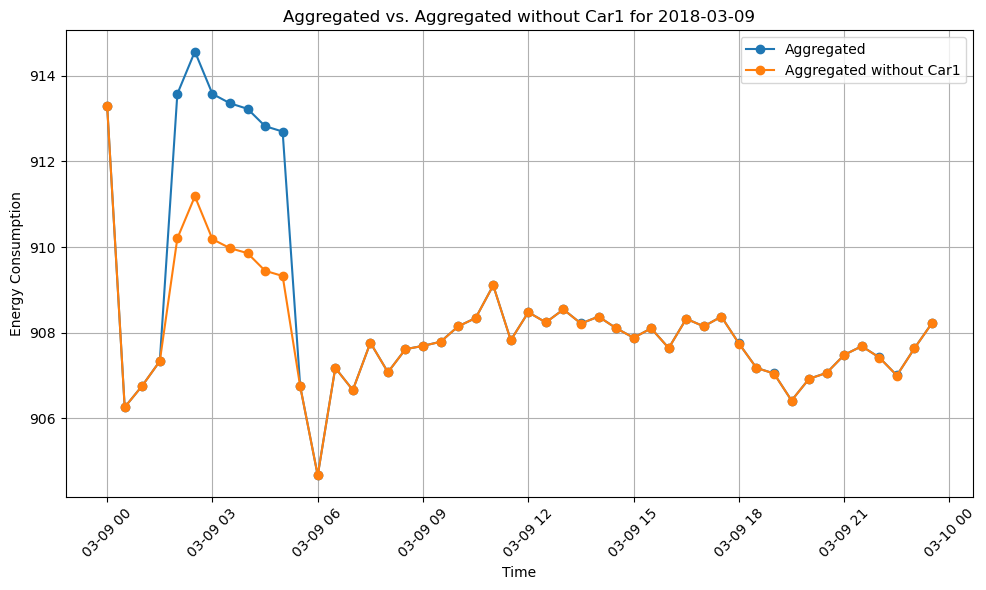

In [ ]:
import pandas as pd

# Assuming df_week_10 contains the DataFrame for week 10 as you mentioned earlier
# Filter the DataFrame for the day of 2018-03-09
selected_date = '2018-03-09'
df_selected_day = df_week_10[df_week_10.index.date == pd.to_datetime(selected_date).date()]

# Display the DataFrame for the selected day
print("DataFrame for", selected_date)
print(df_selected_day)

# Create a new DataFrame for the selected day
new_df_selected_day = pd.DataFrame(df_selected_day)

# If you want to plot only for this day:
plt.figure(figsize=(10, 6))
plt.plot(df_selected_day.index, df_selected_day['aggregated'], marker='o', linestyle='-', label='Aggregated')
plt.plot(df_selected_day.index, df_selected_day['aggregated_without_car1'], marker='o', linestyle='-', label='Aggregated without Car1')
plt.title('Aggregated vs. Aggregated without Car1 for ' + selected_date)
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from hmmlearn import hmm

# Step 2: Model Selection
n_components = 3  # Number of states in the HMM
model = hmm.GaussianHMM(n_components=n_components, covariance_type="full")

# Step 3: Training
# Train the HMM using the aggregated data
model.fit(downsampled_df)

# Step 4: Disaggregation
# Use the trained HMM to predict hidden states for disaggregated data
hidden_states = model.predict(downsampled_df)

# You can then use the hidden states to disaggregate the data
# For example, you can assign each observation to the most likely state
# and use the corresponding mean value as the disaggregated value

# Assuming disaggregated_data is a DataFrame with the same index as aggregated_data
disaggregated_data = downsampled_df.copy()
for i, state in enumerate(hidden_states):
    disaggregated_data.iloc[i] = model.means_[state]


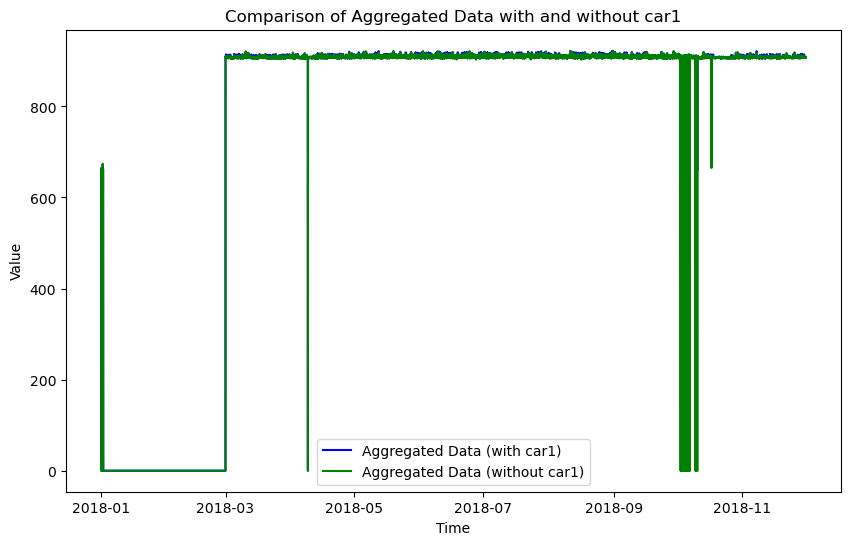

In [ ]:
import matplotlib.pyplot as plt

# Plot aggregated data
plt.figure(figsize=(10, 6))
plt.plot(downsampled_df.index, downsampled_df['aggregated'], label='Aggregated Data (with car1)', color='blue')
plt.plot(downsampled_df.index, downsampled_df['aggregated_without_car1'], label='Aggregated Data (without car1)', color='green')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Comparison of Aggregated Data with and without car1')
plt.legend()

# Show plot
plt.show()
